In [71]:
#! gsutil -m cp -r data gs://derma-data/raw_data

In [72]:
#! gsutil -m cp -r archive.zip gs://derma-data/raw_data

In [73]:
import pandas as pd
df = pd.read_csv('ISIC_2019_Training_Metadata.csv')

In [74]:
df

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   age_approx           24894 non-null  float64
 2   anatom_site_general  22700 non-null  object 
 3   lesion_id            23247 non-null  object 
 4   sex                  24947 non-null  object 
dtypes: float64(1), object(4)
memory usage: 989.6+ KB


In [76]:
len(df)

25331

In [77]:
df.columns

Index(['image', 'age_approx', 'anatom_site_general', 'lesion_id', 'sex'], dtype='object')

In [78]:
df.drop(columns=['lesion_id'], inplace = True)

In [79]:
df.columns

Index(['image', 'age_approx', 'anatom_site_general', 'sex'], dtype='object')

In [80]:
df.duplicated().sum()

0

In [81]:
# Counting the number of NaN for each column
df.isnull().sum().sort_values(ascending=False)

anatom_site_general    2631
age_approx              437
sex                     384
image                     0
dtype: int64

In [82]:
df.isnull().sum().sort_values(ascending=False)/len(df)

anatom_site_general    0.103865
age_approx             0.017252
sex                    0.015159
image                  0.000000
dtype: float64

In [83]:
import numpy as np
df.anatom_site_general.replace(np.nan, "unknown", inplace=True) #Replace NaN by "Unknown"
df.anatom_site_general.value_counts()

anterior torso     6915
lower extremity    4990
head/neck          4587
upper extremity    2910
posterior torso    2787
unknown            2631
palms/soles         398
oral/genital         59
lateral torso        54
Name: anatom_site_general, dtype: int64

In [84]:
#Replace missing age_approx values with mean
df.age_approx.replace(np.nan, df.age_approx.mean())

0        55.0
1        30.0
2        60.0
3        30.0
4        80.0
         ... 
25326    85.0
25327    65.0
25328    70.0
25329    55.0
25330    50.0
Name: age_approx, Length: 25331, dtype: float64

In [85]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [86]:
df.isnull().sum().sort_values(ascending=False)/len(df)

age_approx             0.017252
image                  0.000000
anatom_site_general    0.000000
sex                    0.000000
dtype: float64

In [87]:
from sklearn.preprocessing import OneHotEncoder
# Check unique values for streets
print(f"The unique values for 'sex' are {df.sex.unique()}")
# Instantiate the OneHotEncoder
ohe_binary = OneHotEncoder(sparse = False)
# Fit encoder
ohe_binary.fit(df[['sex']])
# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe_binary.categories_}")

The unique values for 'sex' are ['female' 'male']
The categories detected by the OneHotEncoder are [array(['female', 'male'], dtype=object)]


In [88]:
# Display the generated names
print(f"The column names for the encoded values are {ohe_binary.get_feature_names_out()}")
# Transform the current "sex" column
df[ohe_binary.get_feature_names_out()] = ohe_binary.transform(df[['sex']])
# Drop the column "Street" which has been encoded
df.drop(columns = ["sex"], inplace = True)
# Show the data
df.head()

The column names for the encoded values are ['sex_female' 'sex_male']


,image,age_approx,anatom_site_general,sex_female,sex_male
0,ISIC_0000000,55.0,anterior torso,1.0,0.0
1,ISIC_0000001,30.0,anterior torso,1.0,0.0
2,ISIC_0000002,60.0,upper extremity,1.0,0.0
3,ISIC_0000003,30.0,upper extremity,0.0,1.0
4,ISIC_0000004,80.0,posterior torso,0.0,1.0


In [89]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Check unique values for anatom
print(f"The unique values for 'anatom' are {df.anatom_site_general.unique()}")
# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse = False)
# Fit encoder
ohe.fit(df[['anatom_site_general']])
# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

The unique values for 'anatom' are ['anterior torso' 'upper extremity' 'posterior torso' 'lower extremity'
 'unknown' 'lateral torso' 'head/neck' 'palms/soles' 'oral/genital']
The categories detected by the OneHotEncoder are [array(['anterior torso', 'head/neck', 'lateral torso', 'lower extremity',
       'oral/genital', 'palms/soles', 'posterior torso', 'unknown',
       'upper extremity'], dtype=object)]


In [90]:
# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")
# Transform the current "anatom" column
df[ohe.get_feature_names_out()] = ohe.transform(df[['anatom_site_general']])
# Drop the column "anatom" which has been encoded
df.drop(columns = ["anatom_site_general"], inplace = True)
# Show the dataset
df.head(3)

The column names for the encoded values are ['anatom_site_general_anterior torso' 'anatom_site_general_head/neck'
 'anatom_site_general_lateral torso' 'anatom_site_general_lower extremity'
 'anatom_site_general_oral/genital' 'anatom_site_general_palms/soles'
 'anatom_site_general_posterior torso' 'anatom_site_general_unknown'
 'anatom_site_general_upper extremity']


,image,age_approx,sex_female,sex_male,anatom_site_general_anterior torso,anatom_site_general_head/neck,anatom_site_general_lateral torso,anatom_site_general_lower extremity,anatom_site_general_oral/genital,anatom_site_general_palms/soles,anatom_site_general_posterior torso,anatom_site_general_unknown,anatom_site_general_upper extremity
0,ISIC_0000000,55.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,30.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


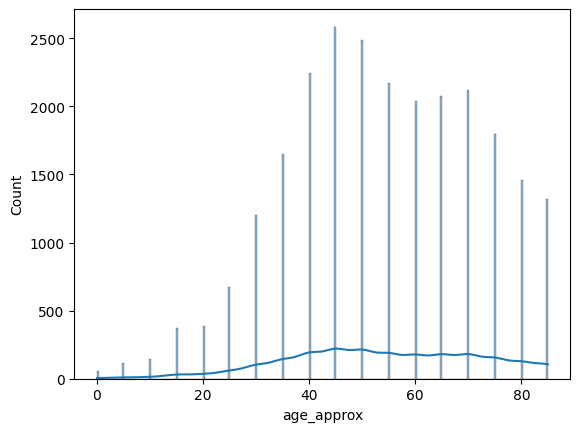

In [91]:
import seaborn as sns
sns.histplot(df['age_approx'], bins=200,kde = True);

<AxesSubplot:xlabel='age_approx'>

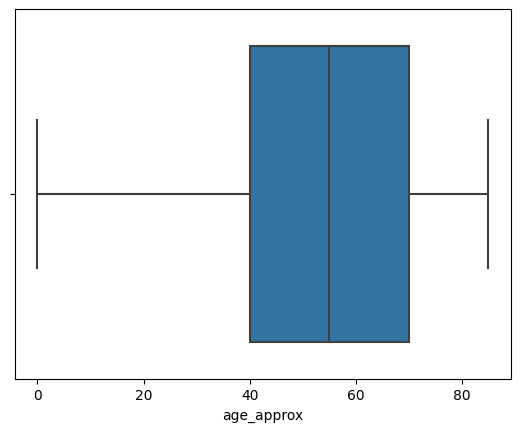

In [92]:
sns.boxplot(data=df, x='age_approx')

In [93]:
from sklearn.preprocessing import MinMaxScaler
# Step 0 - Instanciate  Scaler
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(df[['age_approx']])
# 2-Scale/Transform
# <-> apply the transformation (value - median) / IQR for every house
df['age_approx'] = minmax_scaler.transform(df[['age_approx']])
df.head()

,image,age_approx,sex_female,sex_male,anatom_site_general_anterior torso,anatom_site_general_head/neck,anatom_site_general_lateral torso,anatom_site_general_lower extremity,anatom_site_general_oral/genital,anatom_site_general_palms/soles,anatom_site_general_posterior torso,anatom_site_general_unknown,anatom_site_general_upper extremity
0,ISIC_0000000,0.647059,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.352941,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,0.705882,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,ISIC_0000003,0.352941,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ISIC_0000004,0.941176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
